<a href="https://colab.research.google.com/github/JunSeokCheon/dacon_sign_language_classification/blob/master/data_load%26augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/kaggle_study/sign_Languague

/content/drive/MyDrive/kaggle_study/sign_Languague


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import PIL

from glob import glob
from google.colab import drive

In [ ]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [ ]:
train['label'][train['label'] == '10-1'] = 10 ## label : 10-1 -> 10
train['label'][train['label'] == '10-2'] = 0 ## Label : 10-2 -> 0
train['label'] = train['label'].apply(lambda x : int(x)) ## Dtype : object -> int

In [ ]:
from tqdm.notebook import tqdm

train_file_names = train["file_name"].to_numpy()
test_file_names = test["file_name"].to_numpy()
target = train["label"].to_numpy()

def load_img(file_names, target, path):   
  images = []
  for img in tqdm(file_names):
    an_img = PIL.Image.open(path + img)
    img_array = np.array(an_img)
    images.append(img_array)
  images = np.array(images)

  targets = target.copy()

  return images, targets

In [ ]:
X, y = load_img(train_file_names, target, path='data/train/')
X_test, _ = load_img(test_file_names, np.array([None]), path='data/test/')

  0%|          | 0/858 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras import layers

IMG_SIZE = 112

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE), 
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.3),
  # layers.Normalization(axis=-1, mean=None, variance=None)
])

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
  # layers.Normalization(axis=-1, mean=None, variance=None)
])

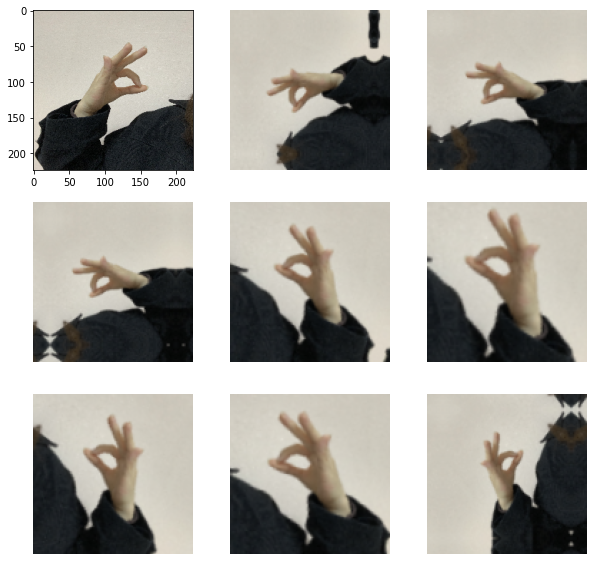

In [ ]:
plt.figure(figsize=(10, 10))

ax = plt.subplot(3, 3, 1)
plt.imshow(x_train[0])
for i in range(1,9):
  augmented_image = data_augmentation(tf.expand_dims(x_train[0],0))
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
agument_size = 9

agumeted_val = resize_and_rescale(x_val)
agumeted_train = resize_and_rescale(x_train)
agumeted_train_y = y_train.copy()
agumeted_val_y = y_val.copy()

for i in range(agument_size):
  agumeted_train = np.concatenate([agumeted_train, data_augmentation(x_train)])
  agumeted_val = np.concatenate([agumeted_val, data_augmentation(x_val)])

  agumeted_train_y = np.concatenate([agumeted_train_y, y_train])
  agumeted_val_y = np.concatenate([agumeted_val_y, y_val])

In [ ]:
ls

agumeted_train.npy           logs/            Untitled1.ipynb
data/                        saved/           weights.best_1.hdf5
keras_baseline_epoch100.csv  Untitled0.ipynb


In [ ]:
np.save('agumeted_train.npy', agumeted_train)
np.save('agumeted_val.npy', agumeted_val)
np.save('agumeted_train_y.npy', agumeted_train_y)
np.save('agumeted_val_y.npy', agumeted_val_y)